# Load data from csv file to data frame

In [1]:
import pandas as pd
import numpy as np
accident_df = pd.read_csv("E:\\ml\\selectedDatasets\\Final\\US_Accidents_May19\\US_Accidents_May19.csv")
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243939 entries, 0 to 2243938
Data columns (total 49 columns):
ID                       object
Source                   object
TMC                      float64
Severity                 int64
Start_Time               object
End_Time                 object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description              object
Number                   float64
Street                   object
Side                     object
City                     object
County                   object
State                    object
Zipcode                  object
Country                  object
Timezone                 object
Airport_Code             object
Weather_Timestamp        object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi

In [2]:
# since data is too large we take only for state California CA
accident_df_ca = pd.read_csv("E:\\ml\\selectedDatasets\\Final\\US_Accidents_May19\\Accidents_CA.csv")
accident_df_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262792 entries, 0 to 262791
Data columns (total 49 columns):
ID                       262792 non-null object
Source                   262792 non-null object
TMC                      262792 non-null int64
Severity                 262792 non-null int64
Start_Time               262792 non-null object
End_Time                 262792 non-null object
Start_Lat                262792 non-null float64
Start_Lng                262792 non-null float64
End_Lat                  0 non-null float64
End_Lng                  0 non-null float64
Distance(mi)             262792 non-null float64
Description              262792 non-null object
Number                   60245 non-null float64
Street                   262792 non-null object
Side                     262792 non-null object
City                     262789 non-null object
County                   262792 non-null object
State                    262792 non-null object
Zipcode                  262767 

In [3]:
accident_df_ca.isnull().sum()

ID                            0
Source                        0
TMC                           0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  262792
End_Lng                  262792
Distance(mi)                  0
Description                   0
Number                   202547
Street                        0
Side                          0
City                          3
County                        0
State                         0
Zipcode                      25
Country                       0
Timezone                     25
Airport_Code               6669
Weather_Timestamp          7771
Temperature(F)             9556
Wind_Chill(F)            256635
Humidity(%)               10126
Pressure(in)               8509
Visibility(mi)             9254
Wind_Direction             7776
Wind_Speed(mph)           70149
Precipitation(in)        246600
Weather_

# Data Pre Processing

In [4]:
# removing non useful columns
accident_df_ca = accident_df_ca.drop(columns =['ID','Source','Timezone','Airport_Code','State','Weather_Timestamp','Description'],axis=1)

In [5]:
# distribution of each wind directon for the target all the 4 severity are same ,thus we can conclude that windirection doesnt have a significient impacct on severity thus it can re removed
# more ver it has 25 levels which will add more complexity to data while factoring
accident_df_ca = accident_df_ca.drop(columns = ['Wind_Direction'],axis = 1)

In [6]:
accident_df_ca.isnull().sum()

TMC                           0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  262792
End_Lng                  262792
Distance(mi)                  0
Number                   202547
Street                        0
Side                          0
City                          3
County                        0
Zipcode                      25
Country                       0
Temperature(F)             9556
Wind_Chill(F)            256635
Humidity(%)               10126
Pressure(in)               8509
Visibility(mi)             9254
Wind_Speed(mph)           70149
Precipitation(in)        246600
Weather_Condition          8998
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabo

In [7]:
# remove those columns which contains null values more than 50%
accident_df_ca = accident_df_ca.drop(columns = ['End_Lat','End_Lng','Number','Wind_Chill(F)','Precipitation(in)'],axis = 1)

In [8]:
accident_df_ca.isnull().sum()

TMC                          0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
Distance(mi)                 0
Street                       0
Side                         0
City                         3
County                       0
Zipcode                     25
Country                      0
Temperature(F)            9556
Humidity(%)              10126
Pressure(in)              8509
Visibility(mi)            9254
Wind_Speed(mph)          70149
Weather_Condition         8998
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_Calming              0
Traffic_Signal               0
Turning_Loop                 0
Sunrise_

In [9]:
# Convert Start_Time and End_Time to datetypes
accident_df_ca['Start_Time'] = pd.to_datetime(accident_df_ca['Start_Time'], errors='coerce')
accident_df_ca['End_Time'] = pd.to_datetime(accident_df_ca['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
accident_df_ca['Year']=accident_df_ca['Start_Time'].dt.year
accident_df_ca['Month']=accident_df_ca['Start_Time'].dt.strftime('%b')
accident_df_ca['Day']=accident_df_ca['Start_Time'].dt.day
accident_df_ca['Hour']=accident_df_ca['Start_Time'].dt.hour
accident_df_ca['Weekday']=accident_df_ca['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, accident_df_ca to the nearest integer
accident_df_ca['Duration_minutes']=round((accident_df_ca['End_Time']-accident_df_ca['Start_Time'])/np.timedelta64(1,'m'))
accident_df_ca.info()
print(accident_df_ca.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262792 entries, 0 to 262791
Data columns (total 42 columns):
TMC                      262792 non-null int64
Severity                 262792 non-null int64
Start_Time               262792 non-null datetime64[ns]
End_Time                 262792 non-null datetime64[ns]
Start_Lat                262792 non-null float64
Start_Lng                262792 non-null float64
Distance(mi)             262792 non-null float64
Street                   262792 non-null object
Side                     262792 non-null object
City                     262789 non-null object
County                   262792 non-null object
Zipcode                  262767 non-null object
Country                  262792 non-null object
Temperature(F)           253236 non-null float64
Humidity(%)              252666 non-null float64
Pressure(in)             254283 non-null float64
Visibility(mi)           253538 non-null float64
Wind_Speed(mph)          192643 non-null float64
Wea

In [10]:
# The "Weather_Condition" variable has a NA level, which means the weather condition information is missing.
# To deal with NA values in a categorical variable, usually there are 2 methods we can use:
# Treat NA as a new level, which will not lose other features' information.
# Remove all records containing this variable's NA value.
# when weather condition is missing, there is a good chance that other weather related variables will be missing too.
null_columns=accident_df_ca.columns[accident_df_ca.isnull().any()]
print(accident_df_ca[accident_df_ca["Weather_Condition"].isnull()][null_columns])
# thus output shows if weatherc ondition is null its corresponding temp,humiditypressure,spped,visibility all are none

                        City     Zipcode  Temperature(F)  Humidity(%)  \
750               Sacramento       95834            95.0         20.0   
957              Morgan Hill       95037            91.4         28.0   
1229             Mill Valley  94941-2440             NaN          NaN   
1240              San Rafael       94903             NaN          NaN   
1245              San Rafael       94903             NaN          NaN   
1250              San Rafael       94903             NaN          NaN   
1261                  Novato       94945             NaN          NaN   
1409               Greenbrae       94904             NaN          NaN   
1417             Mill Valley       94941             NaN          NaN   
1614                  Novato       94947             NaN          NaN   
1615              San Rafael       94903             NaN          NaN   
1616              San Rafael       94901             NaN          NaN   
1632              San Rafael       94903           

In [11]:
# thus remove records containing NA in weather condition
accident_df_ca = accident_df_ca[~accident_df_ca['Weather_Condition'].isnull()]
null_columns=accident_df_ca.columns[accident_df_ca.isnull().any()]
print(accident_df_ca[accident_df_ca["Weather_Condition"].isnull()][null_columns])
# thus no more NA in weather condition since index array is empty

Empty DataFrame
Columns: [City, Temperature(F), Humidity(%), Pressure(in), Visibility(mi), Wind_Speed(mph), Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight]
Index: []


In [12]:
# There are several variables indicating the location of the accident. Apart from the accurate coordinate, longitude and latitude, the dataset also contains state, city, county and even street address. However, they are not all useful in this project.
accident_df_ca = accident_df_ca.drop(columns=['City','County','Zipcode','Country','Street'],axis =1)
print(accident_df_ca.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253794 entries, 0 to 262791
Data columns (total 37 columns):
TMC                      253794 non-null int64
Severity                 253794 non-null int64
Start_Time               253794 non-null datetime64[ns]
End_Time                 253794 non-null datetime64[ns]
Start_Lat                253794 non-null float64
Start_Lng                253794 non-null float64
Distance(mi)             253794 non-null float64
Side                     253794 non-null object
Temperature(F)           252349 non-null float64
Humidity(%)              251784 non-null float64
Pressure(in)             253243 non-null float64
Visibility(mi)           252823 non-null float64
Wind_Speed(mph)          191993 non-null float64
Weather_Condition        253794 non-null object
Amenity                  253794 non-null bool
Bump                     253794 non-null bool
Crossing                 253794 non-null bool
Give_Way                 253794 non-null bool
Junction   

In [13]:
accident_df_ca['TMC'] = accident_df_ca['TMC'].factorize()[0]
accident_df_ca['TMC'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20], dtype=int64)

In [14]:
accident_df_ca.isnull().sum()

TMC                          0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
Distance(mi)                 0
Side                         0
Temperature(F)            1445
Humidity(%)               2010
Pressure(in)               551
Visibility(mi)             971
Wind_Speed(mph)          61801
Weather_Condition            0
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_Calming              0
Traffic_Signal               0
Turning_Loop                 0
Sunrise_Sunset               3
Civil_Twilight               3
Nautical_Twilight            3
Astronomical_Twilight        3
Year                         0
Month   

In [15]:
# above output shows that continious variables  such as  temp,humidity,presuure,visibility and wind speed has nan values, should replace nan with the mean
accident_df_ca['Temperature(F)'].fillna(accident_df_ca['Temperature(F)'].mean(),inplace = True)

In [16]:
# verify if nan values are eliminated
accident_df_ca['Temperature(F)'].isnull().sum()

0

In [17]:
# replace na values of continious variables wth mean
accident_df_ca['Humidity(%)'].fillna(accident_df_ca['Humidity(%)'].mean(),inplace = True)
accident_df_ca['Pressure(in)'].fillna(accident_df_ca['Pressure(in)'].mean(),inplace = True)
accident_df_ca['Visibility(mi)'].fillna(accident_df_ca['Visibility(mi)'].mean(),inplace = True)
accident_df_ca['Wind_Speed(mph)'].fillna(accident_df_ca['Wind_Speed(mph)'].mean(),inplace = True)
# verify to check if all the continous values are non null
accident_df_ca.isnull().sum()

TMC                      0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Side                     0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           3
Civil_Twilight           3
Nautical_Twilight        3
Astronomical_Twilight    3
Year                     0
Month                    0
Day                      0
Hour                     0
Weekday                  0
Duration_minutes         0
d

In [18]:
# remove nan from actegorical variables
# since sunset,civil,nautical,astronomical all these categorical vales have just 3 nan it can be remove
accident_df_ca.dropna(inplace= True)
accident_df_ca.isnull().sum()
# thus non of the data has nan

TMC                      0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Side                     0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
Year                     0
Month                    0
Day                      0
Hour                     0
Weekday                  0
Duration_minutes         0
d

In [19]:
#  Drop weather condition or TMC levels
"""Some weather condition or TMC levels only have a few records, which may cause issues when we split the dataset.
For example, some levels may appear in training dataset but will not appear in test dataset,
and when we use the model built on training dataset to make predictions on test dataset, the levels won't match.

So, here we remove weather condition levels with less than 20 records and TMC levels with less than 10 records. Also, when we remove these levels from the dataset, it'll help reduce the complexity of the final model.

These are the levels we drop:"""

"Some weather condition or TMC levels only have a few records, which may cause issues when we split the dataset.\nFor example, some levels may appear in training dataset but will not appear in test dataset,\nand when we use the model built on training dataset to make predictions on test dataset, the levels won't match.\n\nSo, here we remove weather condition levels with less than 20 records and TMC levels with less than 10 records. Also, when we remove these levels from the dataset, it'll help reduce the complexity of the final model.\n\nThese are the levels we drop:"

In [20]:
accident_df_ca["TMC"].value_counts()

0     205136
4      34860
5       3780
1       2791
2       2118
3       1377
8        691
9        671
14       623
11       571
10       413
6        219
12       122
18       110
13       101
7         90
19        57
17        34
16        19
15         6
20         2
Name: TMC, dtype: int64

In [21]:
# remove the categorical values whose count is lesser than 10
accident_df_ca = accident_df_ca.groupby('TMC').filter(lambda x : len(x)>10)


In [22]:
accident_df_ca["TMC"].value_counts()

0     205136
4      34860
5       3780
1       2791
2       2118
3       1377
8        691
9        671
14       623
11       571
10       413
6        219
12       122
18       110
13       101
7         90
19        57
17        34
16        19
Name: TMC, dtype: int64

In [23]:
accident_df_ca["Weather_Condition"].value_counts()

Clear                           139532
Overcast                         31212
Mostly Cloudy                    23858
Partly Cloudy                    20275
Scattered Clouds                 15213
Haze                              9214
Light Rain                        8900
Rain                              2521
Smoke                              789
Heavy Rain                         754
Fog                                719
Mist                               161
Light Drizzle                      136
Drizzle                             80
Light Snow                          77
Rain Showers                        61
Patches of Fog                      57
Light Thunderstorms and Rain        35
Shallow Fog                         34
Thunderstorms and Rain              31
Snow                                30
Widespread Dust                     21
Heavy Drizzle                       15
Thunderstorm                        13
Light Rain Showers                   9
Heavy Thunderstorms and R

In [24]:
# remove the weather condition values whose count is lesser than 20
accident_df_ca = accident_df_ca.groupby('Weather_Condition').filter(lambda x : len(x)>20)

In [25]:
accident_df_ca["Weather_Condition"].value_counts()

Clear                           139532
Overcast                         31212
Mostly Cloudy                    23858
Partly Cloudy                    20275
Scattered Clouds                 15213
Haze                              9214
Light Rain                        8900
Rain                              2521
Smoke                              789
Heavy Rain                         754
Fog                                719
Mist                               161
Light Drizzle                      136
Drizzle                             80
Light Snow                          77
Rain Showers                        61
Patches of Fog                      57
Light Thunderstorms and Rain        35
Shallow Fog                         34
Thunderstorms and Rain              31
Snow                                30
Widespread Dust                     21
Name: Weather_Condition, dtype: int64

In [26]:
accident_df_ca["Severity"].value_counts()

2    140650
3    112787
1       176
4        94
0         3
Name: Severity, dtype: int64

In [27]:
 accident_df_ca = accident_df_ca[ accident_df_ca['Severity'] != 0 ]

In [28]:
accident_df_ca["Severity"].value_counts()

2    140650
3    112787
1       176
4        94
Name: Severity, dtype: int64

In [29]:
temp_graph = accident_df_ca["Severity"].value_counts().copy()
temp_graph.loc[1]

176

# Distribution of samples among the four classes

In [30]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = [1,2,3,4]
y_pos = np.arange(len(objects))
performance = [temp_graph[1],temp_graph[2],temp_graph[3],temp_graph[4]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Severity category')
plt.title('Values present')

plt.show()

<Figure size 640x480 with 1 Axes>

In [31]:
accident_df_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253707 entries, 0 to 262791
Data columns (total 37 columns):
TMC                      253707 non-null int64
Severity                 253707 non-null int64
Start_Time               253707 non-null datetime64[ns]
End_Time                 253707 non-null datetime64[ns]
Start_Lat                253707 non-null float64
Start_Lng                253707 non-null float64
Distance(mi)             253707 non-null float64
Side                     253707 non-null object
Temperature(F)           253707 non-null float64
Humidity(%)              253707 non-null float64
Pressure(in)             253707 non-null float64
Visibility(mi)           253707 non-null float64
Wind_Speed(mph)          253707 non-null float64
Weather_Condition        253707 non-null object
Amenity                  253707 non-null bool
Bump                     253707 non-null bool
Crossing                 253707 non-null bool
Give_Way                 253707 non-null bool
Junction   

In [32]:
accident_df_ca = accident_df_ca.drop(columns = ['Start_Time','End_Time'],axis = 1)

In [33]:
accident_df_ca['Side'].value_counts()
accident_df_ca = accident_df_ca[ accident_df_ca['Side'] != ' ' ]


In [34]:
accident_df_ca['Side'].value_counts()

R    224641
L     29065
Name: Side, dtype: int64

In [35]:
#in categorical values unique values are taken and converted into numerical using getDummies()
categorical_columns = ['Side']
for col in categorical_columns:
    print(np.unique(accident_df_ca[col]))
    
accident_df_ca = pd.get_dummies(accident_df_ca,columns=categorical_columns)
accident_df_ca[0:5]

['L' 'R']


,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Weekday,Duration_minutes,Side_L,Side_R
0,0,3,38.085300,-122.233017,0.0,75.0,48.0,30.00,10.0,5.8,...,Day,Day,2016,Jun,21,10,Tue,30.0,0,1
1,0,3,37.631813,-122.084167,0.0,75.0,48.0,30.06,10.0,4.6,...,Day,Day,2016,Jun,21,10,Tue,46.0,0,1
2,0,2,37.896564,-122.070717,0.0,82.9,31.0,29.97,10.0,4.6,...,Day,Day,2016,Jun,21,10,Tue,30.0,0,1
3,0,3,37.334255,-122.032471,0.0,75.9,48.0,30.04,10.0,4.6,...,Day,Day,2016,Jun,21,10,Tue,30.0,0,1
4,0,2,37.250729,-121.910713,0.0,75.2,41.0,30.06,10.0,5.8,...,Day,Day,2016,Jun,21,10,Tue,48.0,0,1


In [36]:
#in categorical values unique values are taken and converted into numerical using getDummies()
categorical_columns = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight','Astronomical_Twilight']
for col in categorical_columns:
    print(np.unique(accident_df_ca[col]))
    
accident_df_ca = pd.get_dummies(accident_df_ca,columns=categorical_columns)
accident_df_ca[0:5]

['Day' 'Night']
['Day' 'Night']
['Day' 'Night']
['Day' 'Night']


,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Side_L,Side_R,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Civil_Twilight_Day,Civil_Twilight_Night,Nautical_Twilight_Day,Nautical_Twilight_Night,Astronomical_Twilight_Day,Astronomical_Twilight_Night
0,0,3,38.085300,-122.233017,0.0,75.0,48.0,30.00,10.0,5.8,...,0,1,1,0,1,0,1,0,1,0
1,0,3,37.631813,-122.084167,0.0,75.0,48.0,30.06,10.0,4.6,...,0,1,1,0,1,0,1,0,1,0
2,0,2,37.896564,-122.070717,0.0,82.9,31.0,29.97,10.0,4.6,...,0,1,1,0,1,0,1,0,1,0
3,0,3,37.334255,-122.032471,0.0,75.9,48.0,30.04,10.0,4.6,...,0,1,1,0,1,0,1,0,1,0
4,0,2,37.250729,-121.910713,0.0,75.2,41.0,30.06,10.0,5.8,...,0,1,1,0,1,0,1,0,1,0


In [37]:
accident_df_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253706 entries, 0 to 262791
Data columns (total 40 columns):
TMC                            253706 non-null int64
Severity                       253706 non-null int64
Start_Lat                      253706 non-null float64
Start_Lng                      253706 non-null float64
Distance(mi)                   253706 non-null float64
Temperature(F)                 253706 non-null float64
Humidity(%)                    253706 non-null float64
Pressure(in)                   253706 non-null float64
Visibility(mi)                 253706 non-null float64
Wind_Speed(mph)                253706 non-null float64
Weather_Condition              253706 non-null object
Amenity                        253706 non-null bool
Bump                           253706 non-null bool
Crossing                       253706 non-null bool
Give_Way                       253706 non-null bool
Junction                       253706 non-null bool
No_Exit                      

In [38]:
#in categorical values unique values are taken and converted into numerical using getDummies()
categorical_columns = ['Month']
for col in categorical_columns:
    print(np.unique(accident_df_ca[col]))
    
accident_df_ca = pd.get_dummies(accident_df_ca,columns=categorical_columns)
accident_df_ca[0:5]

['Apr' 'Aug' 'Dec' 'Feb' 'Jan' 'Jul' 'Jun' 'Mar' 'May' 'Nov' 'Oct' 'Sep']


,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,3,38.085300,-122.233017,0.0,75.0,48.0,30.00,10.0,5.8,...,0,0,0,0,1,0,0,0,0,0
1,0,3,37.631813,-122.084167,0.0,75.0,48.0,30.06,10.0,4.6,...,0,0,0,0,1,0,0,0,0,0
2,0,2,37.896564,-122.070717,0.0,82.9,31.0,29.97,10.0,4.6,...,0,0,0,0,1,0,0,0,0,0
3,0,3,37.334255,-122.032471,0.0,75.9,48.0,30.04,10.0,4.6,...,0,0,0,0,1,0,0,0,0,0
4,0,2,37.250729,-121.910713,0.0,75.2,41.0,30.06,10.0,5.8,...,0,0,0,0,1,0,0,0,0,0


In [39]:
#in categorical values unique values are taken and converted into numerical using getDummies()
categorical_columns = ['Weather_Condition']
for col in categorical_columns:
    print(np.unique(accident_df_ca[col]))
    
accident_df_ca = pd.get_dummies(accident_df_ca,columns=categorical_columns)
accident_df_ca[0:5]

['Clear' 'Drizzle' 'Fog' 'Haze' 'Heavy Rain' 'Light Drizzle' 'Light Rain'
 'Light Snow' 'Light Thunderstorms and Rain' 'Mist' 'Mostly Cloudy'
 'Overcast' 'Partly Cloudy' 'Patches of Fog' 'Rain' 'Rain Showers'
 'Scattered Clouds' 'Shallow Fog' 'Smoke' 'Snow' 'Thunderstorms and Rain'
 'Widespread Dust']


,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Weather_Condition_Partly Cloudy,Weather_Condition_Patches of Fog,Weather_Condition_Rain,Weather_Condition_Rain Showers,Weather_Condition_Scattered Clouds,Weather_Condition_Shallow Fog,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorms and Rain,Weather_Condition_Widespread Dust
0,0,3,38.085300,-122.233017,0.0,75.0,48.0,30.00,10.0,5.8,...,0,0,0,0,0,0,0,0,0,0
1,0,3,37.631813,-122.084167,0.0,75.0,48.0,30.06,10.0,4.6,...,0,0,0,0,0,0,0,0,0,0
2,0,2,37.896564,-122.070717,0.0,82.9,31.0,29.97,10.0,4.6,...,0,0,0,0,0,0,0,0,0,0
3,0,3,37.334255,-122.032471,0.0,75.9,48.0,30.04,10.0,4.6,...,0,0,0,0,0,0,0,0,0,0
4,0,2,37.250729,-121.910713,0.0,75.2,41.0,30.06,10.0,5.8,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#in categorical values unique values are taken and converted into numerical using getDummies()
categorical_columns = ['Weekday']
for col in categorical_columns:
    print(np.unique(accident_df_ca[col]))
    
accident_df_ca = pd.get_dummies(accident_df_ca,columns=categorical_columns)
accident_df_ca[0:5]

['Fri' 'Mon' 'Sat' 'Sun' 'Thu' 'Tue' 'Wed']


,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Weather_Condition_Snow,Weather_Condition_Thunderstorms and Rain,Weather_Condition_Widespread Dust,Weekday_Fri,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed
0,0,3,38.085300,-122.233017,0.0,75.0,48.0,30.00,10.0,5.8,...,0,0,0,0,0,0,0,0,1,0
1,0,3,37.631813,-122.084167,0.0,75.0,48.0,30.06,10.0,4.6,...,0,0,0,0,0,0,0,0,1,0
2,0,2,37.896564,-122.070717,0.0,82.9,31.0,29.97,10.0,4.6,...,0,0,0,0,0,0,0,0,1,0
3,0,3,37.334255,-122.032471,0.0,75.9,48.0,30.04,10.0,4.6,...,0,0,0,0,0,0,0,0,1,0
4,0,2,37.250729,-121.910713,0.0,75.2,41.0,30.06,10.0,5.8,...,0,0,0,0,0,0,0,0,1,0


In [41]:
conda install -c glemaitre imbalanced-learn

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.1.1-0
  - defaults/win-64::ca-certificates-2020.1.1-0done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [42]:

X = accident_df_ca.loc[:,accident_df_ca.columns != 'Severity']
y = accident_df_ca[['Severity']]

# Features Selection with Univariate Statistics Tests

In [43]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# # load data
# filename = 'pima-indians-diabetes.data.csv'
# names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# dataframe = read_csv(filename, names=names)
# array = dataframe.values
independent = accident_df_ca.loc[:,accident_df_ca.columns != 'Severity']
dependent = accident_df_ca[['Severity']]
# feature extraction
test = SelectKBest(score_func=f_classif, k=6)
fit = test.fit(independent, dependent)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(independent)
print("Top 6 features : ",independent.columns[fit.get_support(indices = True)])

C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [21] are constant.
  UserWarning)
C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[5.789e+02 1.925e+03 1.401e+03 3.495e+02 7.169e+01 1.152e+01 1.164e+01
 2.915e+00 1.304e+00 7.867e+01 3.696e+00 8.630e+02 1.792e+01 4.100e+02
 1.154e+01 1.495e+01 2.144e+00 1.067e+02 8.378e+02 6.083e+00 2.521e+03
       nan 1.290e+02 1.095e+00 1.051e+01 5.054e-01 6.984e+03 6.984e+03
 9.010e+00 9.010e+00 9.930e+00 9.930e+00 1.274e+01 1.274e+01 9.932e+00
 9.932e+00 7.884e+00 1.109e+00 3.257e+00 1.735e+00 2.014e+00 1.897e+01
 2.072e+01 1.568e+01 3.554e+00 6.789e+00 7.732e+00 6.547e-01 1.254e+02
 5.290e+01 1.419e+01 1.626e+01 3.507e+00 1.357e+00 2.629e+00 2.049e+00
 2.524e-02 8.470e+00 1.415e+01 1.633e+00 8.209e+01 3.084e+00 1.072e+01
 1.062e+00 2.865e+01 1.381e+00 1.113e+01 3.308e+01 4.585e-01 3.501e-02
 1.313e+00 9.965e+00 4.750e+01 3.322e+01 9.645e-01 8.549e+00 1.693e+01]
Top 6 features :  Index(['Start_Lat', 'Start_Lng', 'Crossing', 'Traffic_Signal', 'Side_L',
       'Side_R'],
      dtype='object')


# Resampling Technique to handle Imbalence data

In [44]:
# performing under and over sampling due to imbalence in data
from imblearn.combine import SMOTETomek
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
X = accident_df_ca[['Crossing','Traffic_Signal','Side_R','Side_L','Start_Lng','Start_Lat']]
y = accident_df_ca[['Severity']]
smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)




C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Correlation Matrix of the independent varaibles to show they are is no multicolinearity

In [45]:
X.corr()

,Crossing,Traffic_Signal,Side_R,Side_L,Start_Lng,Start_Lat
Crossing,1.000000,0.327325,-0.084361,0.084361,-0.060485,0.058501
Traffic_Signal,0.327325,1.000000,-0.120862,0.120862,0.034118,-0.036563
Side_R,-0.084361,-0.120862,1.000000,-1.000000,0.038511,-0.064707
Side_L,0.084361,0.120862,-1.000000,1.000000,-0.038511,0.064707
Start_Lng,-0.060485,0.034118,0.038511,-0.038511,1.000000,-0.951576
Start_Lat,0.058501,-0.036563,-0.064707,0.064707,-0.951576,1.000000


# Distribution of samples among all classes after resampling

4    139892
1    139711
3    139017
2    138686
dtype: int64

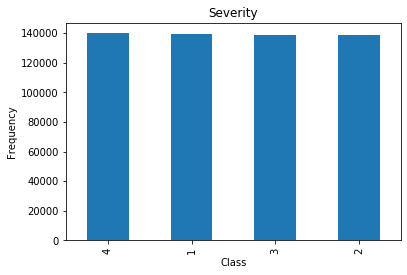

In [46]:
pd.value_counts(y_smt).plot.bar()
plt.title('Severity')
plt.xlabel('Class')
plt.ylabel('Frequency')
pd.value_counts(y_smt)
# thus plot shows all 4 categorical variables are baleneced

# Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

start_time = time.time()
X_train,X_test,y_train,y_test =  train_test_split(X_smt,y_smt,test_size = 0.25)
clf_rf = RandomForestClassifier(random_state = 0)
clf_rf.fit(X_train,y_train)
y_predict = clf_rf.predict(X_test)
score = accuracy_score(y_test,y_predict)
classification_report = classification_report(y_test,y_predict)
confusionMatrix = confusion_matrix(y_test,y_predict)
precisionScore = precision_score(y_test,y_predict,average =None,labels=[1,2,3,4])
print("\nAccuracy : " ,score)
print("\nPrecison Score : ",precisionScore.mean())
print('\nConfusion matrix\n\n', confusionMatrix)
print("\ntime Taken : " ,time.time()-start_time)
print("\nClassification Report\n\n")
print(classification_report)



Accuracy :  0.9515312896997711

Precison Score :  0.9514490373797435

Confusion matrix

 [[33693   443   125   332]
 [  990 31777  1784   316]
 [  151  1371 33028   389]
 [  308   183   361 34076]]

time Taken :  6.666181564331055

Classification Report


             precision    recall  f1-score   support

          1       0.96      0.97      0.97     34593
          2       0.94      0.91      0.93     34867
          3       0.94      0.95      0.94     34939
          4       0.97      0.98      0.97     34928

avg / total       0.95      0.95      0.95    139327



# Cross Validation for Random Forest Model 

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_rf, X_smt, y_smt, cv = 5)
print('Average cross-validation Accuracy score: {:.4f}'.format(scores.mean()))

Average cross-validation Accuracy score: 0.9483


# Naive Bayes Model

In [54]:
#Navie Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
X_train,X_test,y_train,y_test =  train_test_split(X_smt,y_smt,test_size = 0.25)
bnb = GaussianNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print("Accuracy: %.2f%%" % ((accuracy_score(y_test,y_pred))*100))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

Accuracy: 36.78%
Confusion Matrix:
[[13650  2942    91 18193]
 [ 5412  4344     0 24740]
 [  514   954     1 33283]
 [ 1578   363    11 33251]]
             precision    recall  f1-score   support

          1       0.65      0.39      0.49     34876
          2       0.50      0.13      0.20     34496
          3       0.01      0.00      0.00     34752
          4       0.30      0.94      0.46     35203

avg / total       0.37      0.37      0.29    139327



# Cross Validation for Naive Bayes Model

In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(bnb, X_smt, y_smt, cv = 5)
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.3666


# logistic Regression Model

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train,X_test,y_train,y_test =  train_test_split(X_smt,y_smt,test_size = 0.25)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: %.2f%%" % ((accuracy_score(y_test,y_pred))*100))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
 

Accuracy: 33.60%
Confusion Matrix:
[[13917  9072  8907  2998]
 [ 6709 10378 13432  4150]
 [  543  8977 15790  9348]
 [ 2294  7670 18411  6731]]
             precision    recall  f1-score   support

          1       0.59      0.40      0.48     34894
          2       0.29      0.30      0.29     34669
          3       0.28      0.46      0.35     34658
          4       0.29      0.19      0.23     35106

avg / total       0.36      0.34      0.34    139327



# Cross Validation for Logistic Regression

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv = 5)
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.3363


# SGDCLassifier

In [58]:
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
X_train,X_test,y_train,y_test =  train_test_split(X_smt,y_smt,test_size = 0.25)
clf = SGDClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: %.2f%%" % ((accuracy_score(y_test,y_pred))*100))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))

C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Accuracy: 27.88%
Confusion Matrix:
[[    0  4847     0 30110]
 [    0  4678     0 30056]
 [    0   382     0 34156]
 [    0   927     0 34171]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00     34957
          2       0.43      0.13      0.21     34734
          3       0.00      0.00      0.00     34538
          4       0.27      0.97      0.42     35098

avg / total       0.17      0.28      0.16    139327



C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
